In [23]:
pip install earthengine-api


Note: you may need to restart the kernel to use updated packages.


In [24]:
 pip install geemap

Note: you may need to restart the kernel to use updated packages.


In [25]:
import ee
import geemap

In [26]:
pip install wheel 


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install ipykernel geemap ipyleaflet==0.16 # Not working with latest ipyleaflet


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [28]:
ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [29]:
srtm = ee.Image("USGS/SRTMGL1_003")

In [31]:
Map = geemap.Map()
Map.addLayer(srtm)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Criar uma variável para armazenar as modificações que fiz na vizualização do mapa

In [32]:
vis = {
    'min':0,
    'max':2000,
    'palette':['9e0142', 'f88d52', 'ffffbf', '89d0a4', '5e4fa2']
}
Map = geemap.Map(location=('-18.08','-54.57'), zoom=5)
Map.addLayer(srtm, vis, 'SRTM')
Map

Map(center=['-18.08', '-54.57'], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

Como baixar a imagem?

In [36]:
###definindo área de interesse:
roi = ee.Geometry.Polygon(
        [[[-36.221406308464054, -8.958929778704137],
          [-36.221406308464054, -9.384629018466807],
          [-35.564973202995304, -9.384629018466807],
          [-35.564973202995304, -8.958929778704137]]]);

#Função para download:
task = ee.batch.Export.image.toDrive(image=srtm, # um objeto ee.Image.
region=roi, # um objeto ee.Geometry.
description='Srtm_alagoas',
folder='MINICURSO_GEE',
fileNamePrefix='Srtm_alagoas',
scale=30,
maxPixels=1e13,
crs='EPSG:4674')  ###Sirgas2000
#Iniciar o download
task.start()

Fazendo analises estatísticas da região

In [39]:
redutores = ee.Reducer.mean().combine(**{
    'reducer2': ee.Reducer.median(),
    'sharedInputs': True}).combine(**{
    'reducer2': ee.Reducer.max(),
    'sharedInputs': True
})


In [40]:
estatistica_zonais = srtm.reduceRegion(**{
'reducer': redutores,
'geometry': roi,
'scale':30,
'bestEffort': True,
'maxPixels':1e13,
'tileScale':4
})

print(estatistica_zonais.getInfo())

{'elevation_max': 1253, 'elevation_mean': 232.2979688455095, 'elevation_median': 179.41726001852342}


In [41]:
import pandas as pd
import matplotlib.pyplot as pl 

In [44]:
##Pegar as estatisticas e transformar em lista:
stats_list = ee.List(estatistica_zonais).getInfo()
##Extrair os valores dos itens ex. 'elevation_max': 1253, 'elevation_mean':
data = list(stats_list.items())
##Transformar em dicionario em DF:
df = pd.DataFrame(data, columns=['elevação', 'valor'])
df

,elevação,valor
0,elevation_max,1253.000000
1,elevation_mean,232.297969
2,elevation_median,179.417260


Criando gráficos

<BarContainer object of 3 artists>

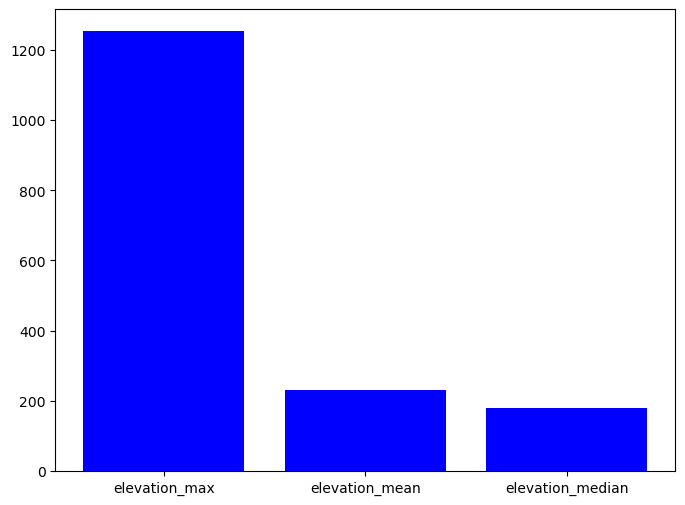

In [54]:
##Extrair dados do dataframe
values= df['valor']
labels = df['elevação']

##Criar uma figura com tamanho 8x6 polegadas
pl.figure(figsize=(8, 6))

# Criar gráfico de colunas com os dados
pl.bar(labels, values, color="blue")


Text(0.5, 0, 'elevação')

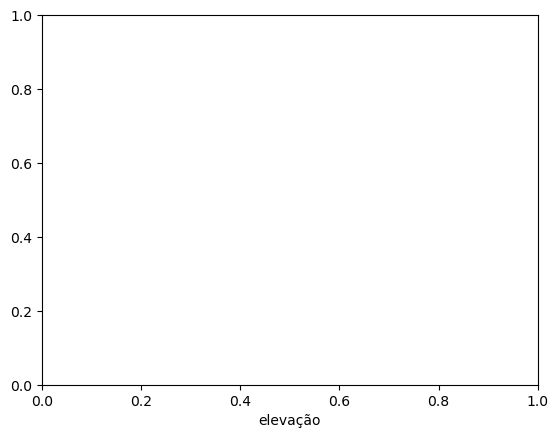

In [55]:
# Adicionar rótulos e título ao gráfico
pl.xlabel("elevação")
pl.ylabel("valor")
pl.legend(["elevação"])
pl.title("Gráfico de Colunas")
##Salvar gráfico
pl.savefig('Gráfico_barra.png')
pl.show()